In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('F:\\Data Science & Machine Learning\\weight-height.csv')

In [3]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [5]:
df.nunique()

Gender       2
Height    8555
Weight    8555
dtype: int64

In [6]:
df_encode=df.copy()

# Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder  

In [8]:
le=LabelEncoder()
df_encode['Gender']=le.fit_transform(df_encode['Gender'])

# Data Seperation for Training & Testing

In [9]:
x=df_encode.drop('Weight',axis=1)

In [10]:
y=df_encode[['Weight']]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

In [13]:
X_train.shape

(5988, 2)

In [14]:
X_test.shape

(2567, 2)

# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg=LinearRegression()

In [17]:
reg.fit(X_train,y_train)  #Fit Model

LinearRegression()

In [18]:
y_pred=reg.predict(X_test)

In [19]:
y_pred

array([[156.20235428],
       [184.93442898],
       [148.42945323],
       ...,
       [159.2442037 ],
       [166.96403181],
       [136.95529212]])

In [20]:
reg.score(X_test,y_pred)

1.0

In [21]:
reg.coef_    #Coefficient 

array([[19.67647385,  5.95976283]])

In [22]:
reg.intercept_   # Intercept

array([-244.11178083])

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)        #mean Squared Error
mae=mean_absolute_error(y_test,y_pred)       #mean absolute Error

In [24]:
mse    #mean Squared Error

102.30154155088867

In [25]:
import math
rmqr=math.sqrt(mse)

In [26]:
rmqr

10.114422452660788

In [27]:
mae      #mean absolute Error

8.029100527825229

In [28]:
r2_score(y_test,y_pred)   # Accuracy for the Model

0.9025307579174772

# KNN Regression

In [29]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=20)

In [30]:
kReg=knn.fit(X_train,y_train)

In [31]:
kReg.predict(X_test)

array([[155.69608676],
       [187.36262583],
       [150.62880477],
       ...,
       [160.52254966],
       [169.01048167],
       [136.46300254]])

In [32]:
kReg.score(X_test,y_pred)

0.9943057191921219

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)        #Error
mse

102.30154155088867

In [34]:
rmse=math.sqrt(mse)
rmse

10.114422452660788

In [35]:
r2_score(y_test,y_pred)  # Accuracy for the Model

0.9025307579174772

# Model Accuracy is 90%

# KNN Classification

In [36]:

df_dia=pd.read_csv('F:\\Data Science & Machine Learning\\diabetes.csv')

In [37]:
df_dia.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


In [38]:
df_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
df_dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Test Train Split

In [40]:
X=df_dia.drop('Outcome',axis=1)

In [41]:
Y=df_dia[['Outcome']]

In [42]:
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=.7,random_state=0)

# KNeighbors Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=50)

In [45]:
knn.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=50)

In [46]:
y_pred=knn.predict(X_test)

In [47]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,balanced_accuracy_score,classification_report,plot_roc_curve

In [49]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[138,  19],
       [ 45,  29]], dtype=int64)

In [50]:
accuracy_score(y_test,y_pred)

0.7229437229437229

In [51]:
balanced_accuracy_score(y_test,y_pred)

0.6354363918058186

In [52]:
precision=precision_score(y_test,y_pred)
precision

0.6041666666666666

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       157
           1       0.60      0.39      0.48        74

    accuracy                           0.72       231
   macro avg       0.68      0.64      0.64       231
weighted avg       0.71      0.72      0.70       231



In [54]:
recall=recall_score(y_test,y_pred,pos_label=1)
recall

0.3918918918918919

In [55]:
specificy=recall_score(y_test,y_pred,pos_label=0)
specificy

0.8789808917197452

In [56]:
tp=cm[0,0]
fn=cm[0,1]
fp=cm[1,0]
tn=cm[1,1]

In [57]:
tp,fn,fp,tn

(138, 19, 45, 29)

In [58]:
specificity_manual=tn/(tn+fp)
specificity_manual

0.3918918918918919

In [59]:
sensivity_manual=tp/(tp+fn)
sensivity_manual

0.8789808917197452

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


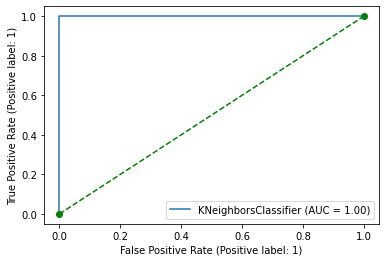

In [60]:
import matplotlib.pyplot as plt       # ROC Curve
plot_roc_curve(knn,X_test,y_pred)
plt.plot([0,1],[0,1],'go--')
plt.show()